In [1271]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

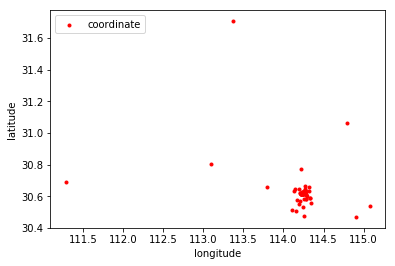

In [1272]:
jwddf = pd.read_csv('D:/data/sun/dbscan/jwd.csv')
plt.scatter(jwddf['pre_night_longitude'], jwddf['pre_night_latitude'], c="red", marker='.', label='coordinate') 
plt.xlabel('longitude')  
plt.ylabel('latitude')  
plt.legend(loc=2)  
plt.show() 


In [1273]:
longitude_zws = jwddf['pre_night_longitude'].median()
longitude_pjs = jwddf['pre_night_longitude'].mean()

latitude_zws = jwddf['pre_night_latitude'].median()
latitude_pjs = jwddf['pre_night_latitude'].mean()
jwddf.shape[0]

139

In [1274]:
test_df = jwddf[(jwddf.pre_night_longitude > longitude_zws - 0.025) &
            (jwddf.pre_night_longitude < longitude_zws + 0.025) &
            (jwddf.pre_night_latitude > latitude_zws - 0.025) &
            (jwddf.pre_night_latitude < latitude_zws + 0.025)]
test_df.shape[0]

101

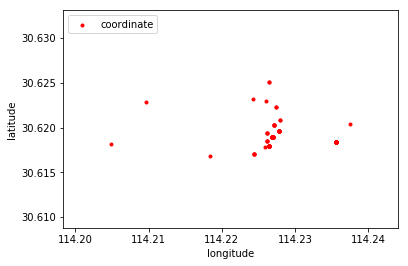

In [1275]:
plt.scatter(test_df['pre_night_longitude'], test_df['pre_night_latitude'], c="red", marker='.', label='coordinate') 
plt.xlabel('longitude')  
plt.ylabel('latitude')  
plt.legend(loc=2)  
plt.show() 

In [1276]:
db = DBSCAN(eps=0.001, min_samples=40).fit(test_df)
print(db.labels_)
print(db.core_sample_indices_)
print(db.labels_.shape)
print(db.core_sample_indices_.shape)


[-1  0 -1  0  0  0 -1  0  0 -1  0 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1
  0  0 -1 -1 -1 -1  0  0 -1 -1  0  0 -1 -1  0 -1  0 -1 -1  0 -1  0  0 -1
  0  0 -1 -1  0 -1 -1  0  0  0 -1  0 -1 -1  0  0 -1  0  0 -1 -1  0  0  0
  0  0 -1 -1  0 -1  0  0 -1 -1 -1  0 -1 -1  0 -1  0 -1 -1 -1  0  0 -1 -1
 -1 -1 -1 -1  0]
[ 1 25 66]
(101,)
(3,)


In [1277]:
labels = db.labels_

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
class_member_mask = (labels == 0)

print(core_samples_mask)
print(class_member_mask)
print(core_samples_mask.shape)
print(class_member_mask.shape)
print(pd.DataFrame(core_samples_mask)[0].value_counts())
print(pd.DataFrame(class_member_mask)[0].value_counts())

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(n_clusters_)
print(n_noise_)

[False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]
[False  True False  True  True  True False  True  True False  True False
  True False False False False False  True False False False  True False
  True  True False False False False  True  True False False  True  True
 False False  True False  True False False  True False  True  True False
  True  True False False  True False False  True  True  True False  True
 False False  True 

(55, 2)
     pre_night_longitude  pre_night_latitude
1             114.227860           30.619560
4             114.224410           30.617090
9             114.224410           30.617090
13            114.235650           30.618378
15            114.227860           30.619560
17            114.224410           30.617090
18            114.235650           30.618378
19            114.235650           30.618378
20            114.224350           30.623230
21            114.235650           30.618378
25            114.235650           30.618378
26            114.235650           30.618378
27            114.235650           30.618378
29            114.227931           30.620853
32            114.235650           30.618378
34            114.235650           30.618378
35            114.235650           30.618378
36            114.227217           30.620297
40            114.235650           30.618378
41            114.235650           30.618378
44            114.226098           30.622978
45

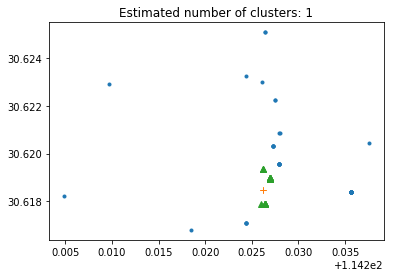

In [1278]:
noise_member_mask = (labels == -1)
xy = test_df[noise_member_mask]
print(xy.shape)
print(xy)
plt.plot(xy['pre_night_longitude'], xy['pre_night_latitude'], '.', markersize=6)
xy = test_df[class_member_mask & core_samples_mask]
print(xy.shape)
print(xy)
plt.plot(xy['pre_night_longitude'], xy['pre_night_latitude'], '+', markersize=6)
xy = test_df[class_member_mask & ~core_samples_mask]
print(xy.shape)
print(xy)
plt.plot(xy['pre_night_longitude'], xy['pre_night_latitude'], '^', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


(46, 2)
     pre_night_longitude  pre_night_latitude
3             114.226226           30.618472
5             114.226941           30.618983
6             114.226420           30.617907
7             114.226200           30.619373
10            114.226941           30.618983
11            114.226420           30.617907
14            114.226200           30.619373
16            114.226420           30.617907
23            114.226990           30.618940
28            114.226941           30.618983
30            114.226200           30.619373
31            114.226226           30.618472
38            114.226941           30.618983
39            114.226420           30.617907
42            114.226941           30.618983
43            114.226990           30.618940
46            114.226420           30.617907
48            114.226420           30.617907
54            114.226420           30.617907
56            114.225982           30.617880
58            114.226941           30.618983
60

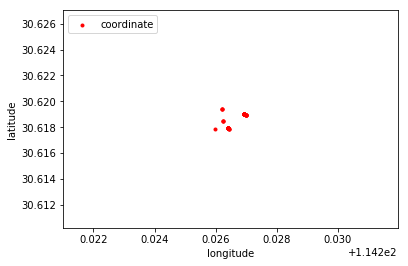

In [1279]:
xy = test_df[class_member_mask]
print(xy.shape)
print(xy)
plt.scatter(xy['pre_night_longitude'], xy['pre_night_latitude'], c="red", marker='.', label='coordinate') 
plt.xlabel('longitude')  
plt.ylabel('latitude')  
plt.legend(loc=2)  
plt.show() 

In [1280]:
xy['pre_night_longitude'].max(),xy['pre_night_longitude'].min(),xy['pre_night_latitude'].max(),xy['pre_night_latitude'].min()

(114.22698999999999, 114.22598232, 30.619373, 30.61788027)